In [12]:
using Revise
using Qutee, Distributions, LinearAlgebra
using Plots

# Steady States of Random Channels and Marchenko-Pastur distribution

The following notebook numerically calculates the steady-states of random channels and compares it with a rescale Marchenko-Pastur distribution.

In [41]:
using Qutee.QuantumInfo.Distributions: MarchenkoPastur
using Qutee.QuantumInfo.Random: ginibre_matrix, rand_density_bures

In [60]:
N = 8 # dimension
r = 2 # rank

d = MarchenkoPastur(N, r)

MarchenkoPastur(N=8.0, d=2.0, λ=1.0)

In [52]:
# Create ensemble of random channels
K = [QuantumInfo.rand_channel(Array, r, N) for _ in 1:1000]

# Get final density steady states
init = K[1][:,:,1]
all = QuantumInfo.power_method.(K, Ref(init), 100)

rho = [a[2] for a in all]
rho = rho./tr.(rho);


# Get the eigenvalue spectrum
eigs = eigvals.(Hermitian.(rho))
eigs = hcat(eigs...)[:];

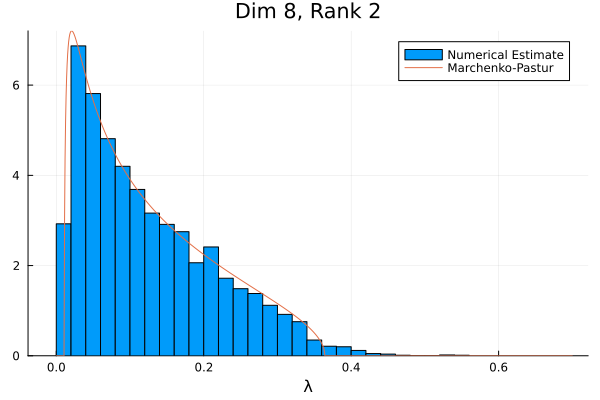

In [68]:
xrange = LinRange(0,0.7,1000)

histogram(eigs, normalize=:pdf, label="Numerical Estimate", fmt=:png)

plot!(xrange, pdf(d, xrange), label="Marchenko-Pastur")

xlabel!("λ")
title!("Dim $(N), Rank $(r)")